<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-4.-Text-versus-Bytes" data-toc-modified-id="Chapter-4.-Text-versus-Bytes-1">Chapter 4. Text versus Bytes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Converting-from-code-points-to-bytes-is-encoding;-converting-from-bytes-to-code-points-is-decoding." data-toc-modified-id="Converting-from-code-points-to-bytes-is-encoding;-converting-from-bytes-to-code-points-is-decoding.-1.0.1">Converting from code points to bytes is encoding; converting from bytes to code points is decoding.</a></span></li><li><span><a href="#bytes-can-be-built-from-a-str,-give-an-encoding.-Each-item-in-a-bytes-sequence-is-an-integer-in-range(256)." data-toc-modified-id="bytes-can-be-built-from-a-str,-give-an-encoding.-Each-item-in-a-bytes-sequence-is-an-integer-in-range(256).-1.0.2">bytes can be built from a str, give an encoding. Each item in a bytes sequence is an integer in range(256).</a></span></li><li><span><a href="#A-slice-of-byte/bytearray-is-also-a-byte/bytearray." data-toc-modified-id="A-slice-of-byte/bytearray-is-also-a-byte/bytearray.-1.0.3">A slice of byte/bytearray is also a byte/bytearray.</a></span></li><li><span><a href="#str-methods-on-bytes-and-bytearrays" data-toc-modified-id="str-methods-on-bytes-and-bytearrays-1.0.4">str methods on bytes and bytearrays</a></span></li></ul></li><li><span><a href="#Structs-and-Memory-Views" data-toc-modified-id="Structs-and-Memory-Views-1.1">Structs and Memory Views</a></span><ul class="toc-item"><li><span><a href="#How-to-Discover-the-Encoding-of-a-Byte-Sequence" data-toc-modified-id="How-to-Discover-the-Encoding-of-a-Byte-Sequence-1.1.1">How to Discover the Encoding of a Byte Sequence</a></span></li><li><span><a href="#A-platform-encoding-issue-(following-code-breaks-on-windows)" data-toc-modified-id="A-platform-encoding-issue-(following-code-breaks-on-windows)-1.1.2">A platform encoding issue (following code breaks on windows)</a></span></li></ul></li><li><span><a href="#Unicode-Normalizations" data-toc-modified-id="Unicode-Normalizations-1.2">Unicode Normalizations</a></span><ul class="toc-item"><li><span><a href="#Case-folding-for-case-insensitive-comparisons" data-toc-modified-id="Case-folding-for-case-insensitive-comparisons-1.2.1">Case folding for case insensitive comparisons</a></span></li><li><span><a href="#Taking-Out-Diacritics" data-toc-modified-id="Taking-Out-Diacritics-1.2.2">Taking Out Diacritics</a></span></li><li><span><a href="#Unicode-database" data-toc-modified-id="Unicode-database-1.2.3">Unicode database</a></span></li><li><span><a href="#str-Versus-bytes-in-Regular-Expressions" data-toc-modified-id="str-Versus-bytes-in-Regular-Expressions-1.2.4">str Versus bytes in Regular Expressions</a></span></li></ul></li></ul></li></ul></div>

# Chapter 4. Text versus Bytes

### Converting from code points to bytes is encoding; converting from bytes to code points is decoding. 

In [4]:
s = 'café'
b = s.encode('utf8')  # b = b'caf\xc3\xa9'
b.decode('utf8')  # 'café'
type(b)

bytes

### bytes can be built from a str, give an encoding. Each item in a bytes sequence is an integer in range(256).

In [18]:
cafe = bytes('café', encoding='utf_8')
cafe[-1]

169

In [19]:
cafe_arr = bytearray('café', encoding='utf_8')
cafe_arr[-1] 

169

### A slice of byte/bytearray is also a byte/bytearray.

In [20]:
cafe[-1:] 

b'\xa9'

In [21]:
cafe_arr[-1:] 

bytearray(b'\xa9')

### str methods on bytes and bytearrays
you can use familiar string methods like endswith, replace, strip, translate, upper, and dozens of others with binary sequences—only using bytes and not str arguments. In addition, the regular expression functions in the re module also work on binary sequences, if the regex is compiled from a binary sequence instead of a str

## Structs and Memory Views

In [22]:
# Create memoryview from file contents in memory
import struct
with open ('bmA.gif', 'rb') as fp:
    img = memoryview(fp.read())

In [23]:
# Convert header to bytes for display only; 10 bytes are copied here.
header = img[:10]
bytes(header)

b'GIF89aY\x01i\x01'

In [25]:
# struct format: < little-endian; 3s3s two sequences of 3 bytes; HH two 16-bit integers.
fmt = '<3s3sHH' 

# Convert to bytes for display only; 10 bytes are copied here.
header = struct.unpack(fmt, header)
header[3]

361

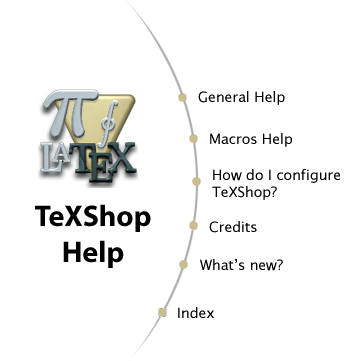

In [27]:
from IPython.display import Image
Image(filename = "bmA.gif", width = header[2], height = header[3])

### How to Discover the Encoding of a Byte Sequence
Short answer: you can’t. You must be told.


### A platform encoding issue (following code breaks on windows)

In [28]:
open('cafe.txt', 'w', encoding='utf_8').write('café')
open('cafe.txt').read()
# The bug: I specified UTF-8 encoding when writing the file 
# but failed to do so when reading it, so Python assumed the system 
# default encoding

# Always pass an explicit encoding= argument when opening text files, 
# because the default may change from one machine to the next

'café'

## Unicode Normalizations
the word “café” may be composed in two ways, using four or five code points, but the result looks exactly the same.

The solution is to use Unicode normalization, provided by the unicodedata.normalize function

In [38]:
from unicodedata import normalize, name

def nfc_equal(str1, str2):
    return normalize('NFC', str1) == normalize('NFC', str2)

def fold_equal(str1, str2):
    return (normalize('NFC', str1).casefold() ==
            normalize('NFC', str2).casefold())

s1 = 'café'
s2 = 'cafe\u0301'
s1, s2 #('café', 'café')
len(s1), len(s2) #(4, 5)
s1 == s2 # False
nfc_equal(s1, s2)

True

In [33]:
normalize('NFC', s1) == normalize('NFC', s2)

True

In [36]:
normalize('NFD', s1) == normalize('NFD', s2)

True

### Case folding for case insensitive comparisons

In [39]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
alphabet.casefold() # abcdefghijklmnopqrstuvwxyz

micro = 'µ'
name(micro) # 'MICRO SIGN'
micro_cf = micro.casefold()
name(micro_cf) # 'GREEK SMALL LETTER MU'
micro, micro_cf # ('µ', 'μ')

eszett = 'ß'
name(eszett) # 'LATIN SMALL LETTER SHARP S'

eszett_cf = eszett.casefold()
eszett, eszett_cf # ('ß', 'ss')

('ß', 'ss')

In [47]:
fold_equal(micro, micro_cf)

True

In [46]:
fold_equal(eszett, eszett_cf)

True

In [42]:
nfc_equal(micro, micro_cf)

False

In [48]:
s3 = 'Straße'
s4 = 'strasse'
nfc_equal(s3, s4) # False
fold_equal(s3, s4)

True

### Taking Out Diacritics

In [52]:
import unicodedata
import string


def shave_marks(txt):
    """Remove all diacritic marks"""
    norm_txt = unicodedata.normalize('NFD', txt)   
    shaved = ''.join(c for c in norm_txt
                     if not unicodedata.combining(c))   
    return unicodedata.normalize('NFC', shaved)   


In [54]:
# Only the letters “è”, “ç”, and “í” are replaced.
order = '“Herr Voß: • ½ cup of Œtker™ caffè latte • bowl of açaí.”'
shave_marks(order)

'“Herr Voß: • ½ cup of Œtker™ caffe latte • bowl of acai.”'

In [56]:
# Both “έ” and “é” are replaced.
Greek = 'Ζέφυρος, Zéfiro'
shave_marks(Greek)

'Ζεφυρος, Zefiro'

### Unicode database
Demo of Unicode database numerical character metadata 

In [57]:
import unicodedata
import re

re_digit = re.compile(r'\d')

sample = '1\xbc\xb2\u0969\u136b\u216b\u2466\u2480\u3285'

for char in sample:
    print('U+%04x' % ord(char),                        
          char.center(6),                              
          're_dig' if re_digit.match(char) else '-',   
          'isdig' if char.isdigit() else '-',          
          'isnum' if char.isnumeric() else '-',        
          format(unicodedata.numeric(char), '5.2f'),   
          unicodedata.name(char),                      
          sep='\t')

U+0031	  1   	re_dig	isdig	isnum	 1.00	DIGIT ONE
U+00bc	  ¼   	-	-	isnum	 0.25	VULGAR FRACTION ONE QUARTER
U+00b2	  ²   	-	isdig	isnum	 2.00	SUPERSCRIPT TWO
U+0969	  ३   	re_dig	isdig	isnum	 3.00	DEVANAGARI DIGIT THREE
U+136b	  ፫   	-	isdig	isnum	 3.00	ETHIOPIC DIGIT THREE
U+216b	  Ⅻ   	-	-	isnum	12.00	ROMAN NUMERAL TWELVE
U+2466	  ⑦   	-	isdig	isnum	 7.00	CIRCLED DIGIT SEVEN
U+2480	  ⒀   	-	-	isnum	13.00	PARENTHESIZED NUMBER THIRTEEN
U+3285	  ㊅   	-	-	isnum	 6.00	CIRCLED IDEOGRAPH SIX


### str Versus bytes in Regular Expressions

In [58]:
import re

re_numbers_str = re.compile(r'\d+') # str type     
re_words_str = re.compile(r'\w+') # str type   
re_numbers_bytes = re.compile(rb'\d+') # bytes type   
re_words_bytes = re.compile(rb'\w+') # bytes type

text_str = ("Ramanujan saw \u0be7\u0bed\u0be8\u0bef"   
            " as 1729 = 1³ + 12³ = 9³ + 10³.")         

text_bytes = text_str.encode('utf_8')   

print('Text', repr(text_str), sep='\n  ')
print('Numbers')
print('  str  :', re_numbers_str.findall(text_str))       
print('  bytes:', re_numbers_bytes.findall(text_bytes))   
print('Words')
print('  str  :', re_words_str.findall(text_str))         
print('  bytes:', re_words_bytes.findall(text_bytes))     


Text
  'Ramanujan saw ௧௭௨௯ as 1729 = 1³ + 12³ = 9³ + 10³.'
Numbers
  str  : ['௧௭௨௯', '1729', '1', '12', '9', '10']
  bytes: [b'1729', b'1', b'12', b'9', b'10']
Words
  str  : ['Ramanujan', 'saw', '௧௭௨௯', 'as', '1729', '1³', '12³', '9³', '10³']
  bytes: [b'Ramanujan', b'saw', b'as', b'1729', b'1', b'12', b'9', b'10']
